In [1]:
# !pip install mrcfile

In [2]:
import mrcfile
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

import os
import cv2

Shape of mrc file: (107, 155, 200)


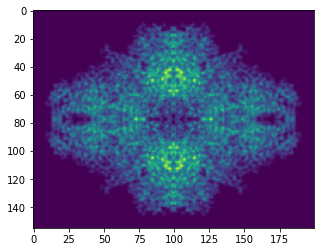

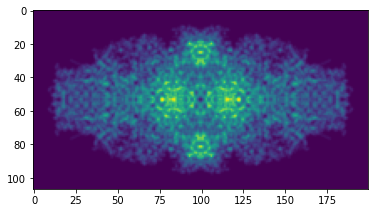

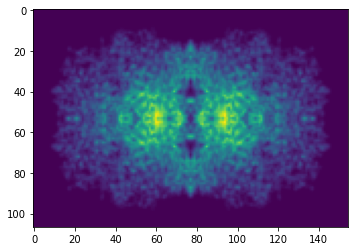

In [3]:
with mrcfile.open('3j7h/3j7h_res3.mrc') as mrc:
    print('Shape of mrc file: {}'.format(mrc.data.shape))
    plt.imshow(np.sum(mrc.data, axis=0)), plt.show()
    plt.imshow(np.sum(mrc.data, axis=1)), plt.show()
    plt.imshow(np.sum(mrc.data, axis=2)), plt.show()

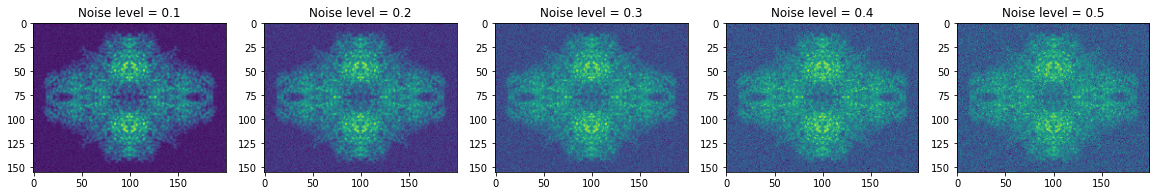

In [4]:
noisy = os.listdir('3j7h')[2:]

fig, axs = plt.subplots(1, 5, figsize=(20,3))

for label, file in enumerate(noisy):
    ax = axs[label]
    noise = (label + 1) /10
    file_name = os.path.join('3j7h', file, file) + '.mrc'
    with mrcfile.open(file_name) as mrc:
        ax.set_title('Noise level = {}'.format(noise))
        ax.imshow(np.sum(mrc.data, axis=0))
        
plt.show()

In [35]:
with mrcfile.open('3j7h/3j7h_res3.mrc') as mrc:
    frame_size = mrc.data.shape[1:][::-1]
    fps = 10
    out = cv2.VideoWriter('3j7h_avi/3j7h_res3.avi',cv2.VideoWriter_fourcc(*'DIVX'), fps, frame_size, False)
    
    # normalize frames to have values between 0 and 1
    frames = mrc.data.copy() / np.max(mrc.data)
    frames_scaled = (frames * 255).astype(np.uint8)
    
    for frame in frames_scaled:
        out.write(frame)
        
    out.release()

In [36]:
def add_gaussian_noise(frames, sigma):
    return np.clip(frames + np.random.normal(0.0, sigma, size=frames.shape), 0.0, 1.0)

In [40]:
noise_sigmas = np.arange(0.05, 0.55, 0.05)
print(noise_sigmas)

for sig in noise_sigmas:
    noisy = add_gaussian_noise(frames, sig)
    noisy_scaled = (noisy * 255).astype(np.uint8)
    
    fname = '3j7h_avi/3j7h_res3_noisy_{:0.2f}.avi'.format(sig)
    out = cv2.VideoWriter(fname, cv2.VideoWriter_fourcc(*'DIVX'), fps, frame_size, False)
    print('writing to ' + str(fname))
        
    for frame in noisy_scaled:
        out.write(frame)
    out.release()
    
print('done')

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
writing to 3j7h_avi/3j7h_res3_noisy_0.00.avi
writing to 3j7h_avi/3j7h_res3_noisy_0.05.avi
writing to 3j7h_avi/3j7h_res3_noisy_0.10.avi
writing to 3j7h_avi/3j7h_res3_noisy_0.15.avi
writing to 3j7h_avi/3j7h_res3_noisy_0.20.avi
writing to 3j7h_avi/3j7h_res3_noisy_0.25.avi
writing to 3j7h_avi/3j7h_res3_noisy_0.30.avi
writing to 3j7h_avi/3j7h_res3_noisy_0.35.avi
writing to 3j7h_avi/3j7h_res3_noisy_0.40.avi
writing to 3j7h_avi/3j7h_res3_noisy_0.45.avi
writing to 3j7h_avi/3j7h_res3_noisy_0.50.avi
done


In [172]:
for label, file in enumerate(noisy):
    noise = (label + 1) /10
    file_name = os.path.join('3j7h', file, file) + '.mrc'
    
    with mrcfile.open(file_name) as mrc:
        print(noise)
        print(np.min(mrc.data), np.max(mrc.data))

0.1
-0.4953882 3.366233
0.2
-1.0351822 3.548423
0.3
-1.4582809 3.8788364
0.4
-1.9477589 4.013586
0.5
-2.488016 3.9566405
